In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
ds  = xr.open_dataset("GPM-V06-IMERG-20211101.nc4", engine="netcdf4")
GPM = ds.precipitationCal.isel(time=-1)
GPM = GPM.where(GPM > 5.0)

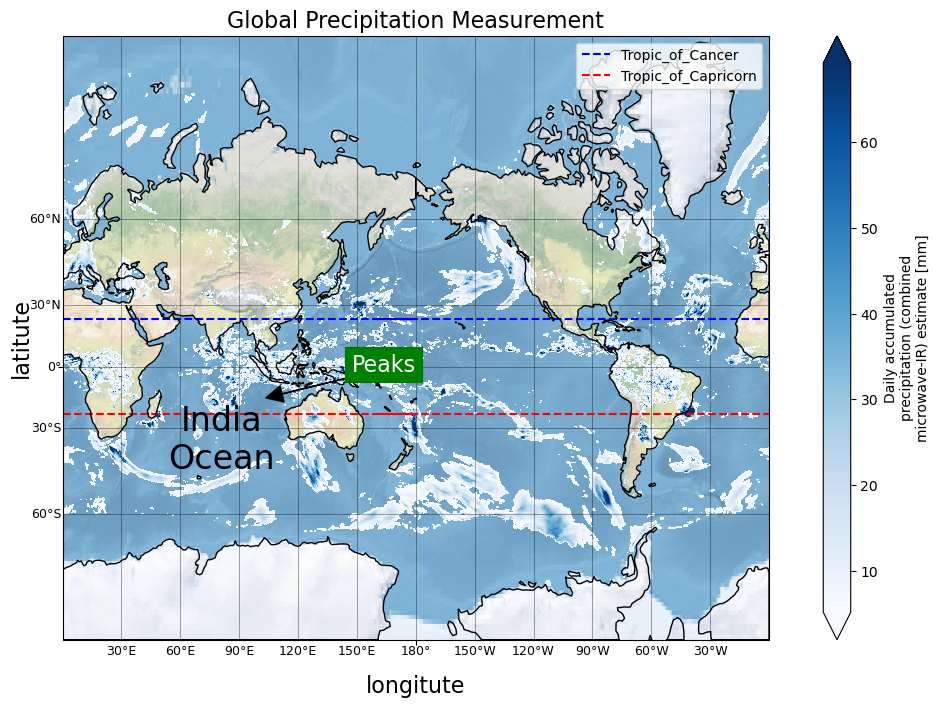

In [12]:
# 初始化，使用墨卡托投影
plt.figure(figsize=(14, 8), dpi=100)
ax = plt.axes(projection=ccrs.Mercator(central_longitude=180.0))

# 画数据相关的2DMesh
GPM.plot(ax=ax, x='lon', y='lat', robust=True, cmap='Blues',
         transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 1.0}, zorder=2)

# 画南北回归线
x1 = np.arange(-200, 200, 20)
y1 = np.ones(x1.shape[0]) * 23.5
y2 = np.ones(x1.shape[0]) * (-23.5)
myplot1 = plt.plot(x1, y1, linestyle="--", color='blue',
                   transform=ccrs.PlateCarree(), label="Tropic_of_Cancer")
myplot2 = plt.plot(x1, y2, linestyle="--", color='red',
                   transform=ccrs.PlateCarree(), label="Tropic_of_Capricorn")

# 加载大陆Feature,加载地表图片
ax.add_feature(cfeature.LAND,  edgecolor='black', facecolor='none', zorder=2)
ax.stock_img()

# 添加经纬网，添加经纬坐标
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color='black', alpha=0.5)  # draw_labels=True,
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))
gl.xlabel_style = {'size': 9, 'rotation': 0}
gl.ylocator = mticker.FixedLocator(np.arange(-90, 90, 30))
gl.ylabel_style = {'size': 9}

# 添加Annotation
plt.annotate('Peaks', xy=(-8.547e+06, -1.79e+06), xytext=(-1.8e+06, -3.0e+05),
             bbox=dict(boxstyle='square', fc='green', linewidth=0.1),
             arrowprops=dict(facecolor='black', shrink=0.01, width=0.1),
             fontsize=16, color='white', horizontalalignment='center')
# 添加Text
plt.text(-1.1e+07, -5.8e+06, "India\nOcean", fontsize=24,
             transform=plt.gca().transData, horizontalalignment='center', color='black')

# 添加X轴、Y轴坐标标题
plt.xticks([180], [" "], fontsize=14)
plt.yticks([-10], ["  "], fontsize=16)
plt.xlabel('longitute', fontsize=16, zorder=10)
plt.ylabel('latitute', fontsize=16, zorder=10)

# 添加图例
plt.legend([myplot1[0], myplot2[0]], ["Tropic_of_Cancer", "Tropic_of_Capricorn"],
           loc='upper right')

# 添加标题
plt.title('Global Precipitation Measurement', fontsize=16)
plt.show()

# Q2-2

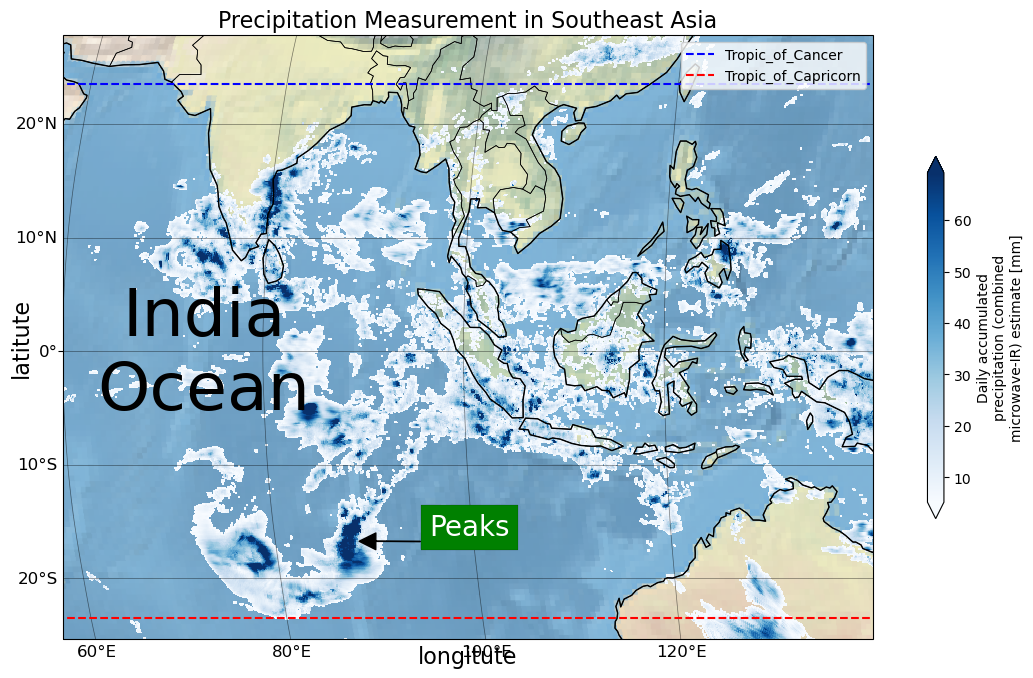

In [13]:
# 初始化，局部图使用罗宾逊椭圆投影
plt.figure(figsize=(14, 8), dpi=100)
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180.0))  # Robinson

# 画数据相关的2DMesh
plt1 = GPM.plot(ax=ax, x='lon', y='lat', robust=True, cmap='Blues',
                transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.6}, zorder=1)

# 画南北回归线
x1 = np.arange(-180, 180, 20)
y1 = np.ones(x1.shape[0]) * 23.5
y2 = np.ones(x1.shape[0]) * (-23.5)
myplot1    = plt.plot(x1, y1, linestyle="--", color='blue',
                               transform=ccrs.PlateCarree(), label="Tropic_of_Cancer")
myplot2 = plt.plot(x1, y2, linestyle="--", color='red',
                               transform=ccrs.PlateCarree(), label="Tropic_of_Capricorn")
# 限定最终显示的经纬度区域
extent = [60, 140, -20, 22]
ax.set_extent(extent)

# 加载地表颜色,大陆Feature,国界线Feature
ax.stock_img()
ax.add_feature(cfeature.LAND,  edgecolor='black', facecolor='none', zorder=1)

ax.add_feature(cfeature.NaturalEarthFeature(category='cultural', name='admin_0_countries',
                                            scale='110m', facecolor='none',edgecolor='black', linewidth=0.5,),
               zorder=1)

# 添加经纬网，添加经纬坐标
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color='black', alpha=0.5)  # draw_labels=True,
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator(np.arange(60, 140, 20))  # 60, 140
gl.xlabel_style = {'size': 12, 'rotation': 0}
gl.ylocator = mticker.FixedLocator(np.arange(-20, 22, 10))
gl.ylabel_style = {'size': 12}

# 添加Annotation
plt.annotate('Peaks', xy=(-8.547e+06, -1.79e+06), xytext=(-7.5e+06, -1.736e+06),
             bbox=dict(boxstyle='square', fc='green', linewidth=0.1),
             arrowprops=dict(facecolor='black', shrink=0.01, width=0.1),
             fontsize=20, color='white', horizontalalignment='center')
# 添加Text
plt.text(-1e+07, -5.5e+05, "India\nOcean", fontsize=48,
             transform=plt.gca().transData, horizontalalignment='center', color='black')

# 添加X轴、Y轴标题
plt.xticks([-60], [" "], fontsize=16)
plt.yticks([0]  , ["  "], fontsize=16)
plt.xlabel('longitute', fontsize=16, zorder=10)
plt.ylabel('latitute', fontsize=16, zorder=10)

# 添加图例
plt.legend([myplot1[0], myplot2[0]], ["Tropic_of_Cancer", "Tropic_of_Capricorn"],
           loc='upper right')

# 添加标题
plt.title('Precipitation Measurement in Southeast Asia', fontsize=16)
plt.show()